In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import glob
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import normaltest, probplot, skew, kurtosis

Summarize P1 layers

In [3]:
# Folder containing the CSV files
data_dir = '/content/drive/MyDrive/CCRI/ccri_repo/data'

!cp -r /content/drive/MyDrive/p1_exposure/* /content/drive/MyDrive/CCRI/ccri_repo/data/p1_exposure/




In [4]:
path = f'{data_dir}/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    #chose 'state' only
    df =  df[(df['type'] == 'State')]
    filename_only = file.split('/')[-1]
    first_two_words = '_'.join(filename_only.split('_')[:2])
    print(f"{first_two_words}: {df['child_population_exposed'].sum()}")

air_pollution: 2307444224.631546
agricultural_drought: 1355624663.8051772
drought_spi: 982189963.5762706
drought_spei: 1044028532.7539995
coastal_flood: 35603948.44620778
extreme_heat: 1183210976.8320282
fire_frequency: 141616401.84203148
fire_FRP: 87793006.69719177
heatwave_duration: 1085724203.8075526
heatwave_frequency: 1047210135.2086339
heatwave_severity: 272539814.34752786
river_flood: 350112398.2531084
tropical_storm: 663664760.6638407
sand_dust: 130315173.12360296
vectorborne_malariapf: 704384239.8208045
vectorborne_malariapv: 626249203.4441776


Hazard data normalization test with plots

In [5]:
#define function to remove outliers and find min max values to reduce skew
def trim_outliers_iteratively(values, max_skew=2, max_kurtosis=3.5):
    """
    Iteratively removes extreme min/max values until skewness <= 2 and kurtosis <= 3.5.
    Returns the trimmed dataset along with the final min and max.
    """
    # values = values.dropna().values  # Ensure no NaNs
    # values = np.log1p(values)
    while True:
        current_skew = skew(values)
        current_kurtosis = kurtosis(values)

        if abs(current_skew) <= max_skew and current_kurtosis <= max_kurtosis:
            break  # Stop if conditions are met

        # Remove min and max values
        min_val, max_val = values.min(), values.max()
        values = values[(values > min_val) & (values < max_val)]  # Trim extreme min/max

    return values, values.min(), values.max()

In [6]:
def boxplot_outlier_detection(values):
    """
    Detect outliers using the IQR method (1.5 IQR rule).
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return values that are within bounds
    return values[(values >= lower_bound) & (values <= upper_bound)], lower_bound, upper_bound

ploting normalized absolute exposure

In [7]:
iso3_name = 'iso3'
adm_name = 'adm0_name'

processed : air_pollution min: 0.1 max: 8.628127684924818
air_pollution: Log Transformation and Scaling - skew=-0.830, kurtosis=-0.716
IQR processed : air_pollution min: -1.8023610300256205 max: 11.848691246659138


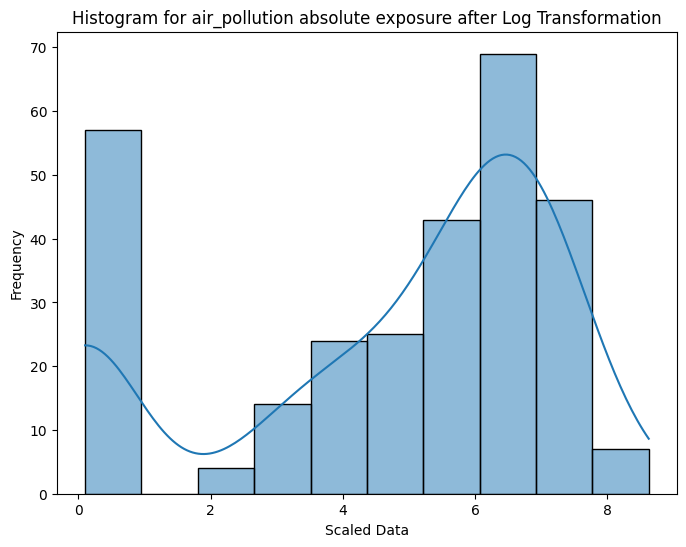

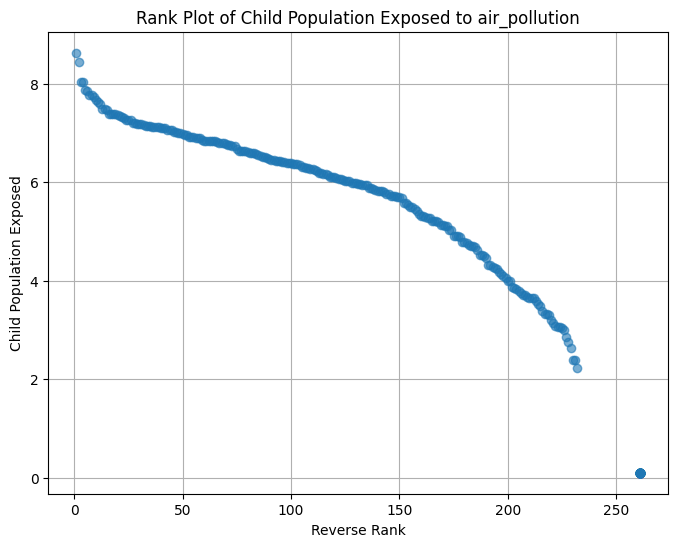

processed : agricultural_drought min: 0.1 max: 8.570507879182806
agricultural_drought: Log Transformation and Scaling - skew=-0.389, kurtosis=-1.526
IQR processed : agricultural_drought min: -9.16639489682016 max: 15.543991494700265


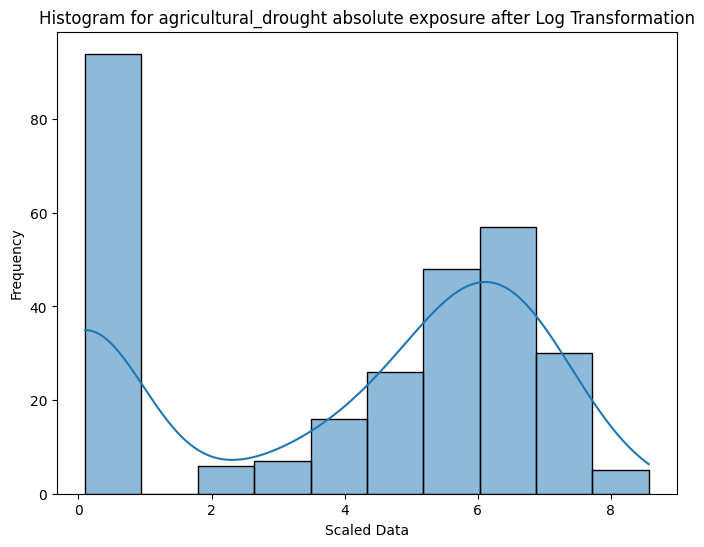

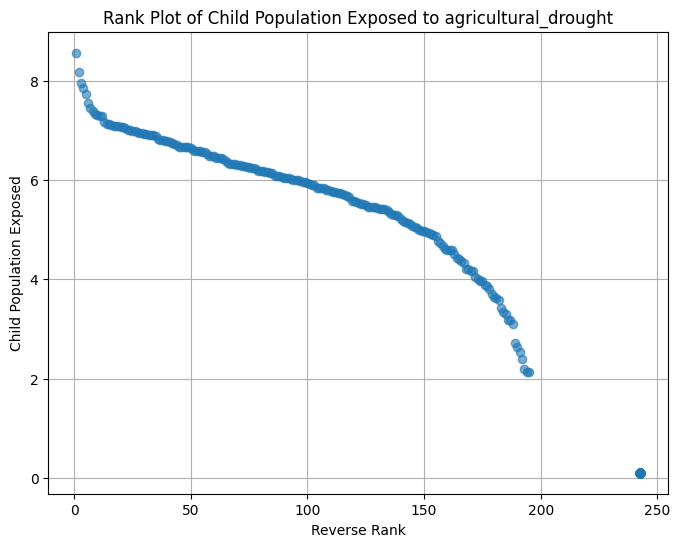

processed : drought_spi min: 0.1 max: 8.180697315914173
drought_spi: Log Transformation and Scaling - skew=-0.146, kurtosis=-1.747
IQR processed : drought_spi min: -9.083231764181008 max: 15.405386273635013


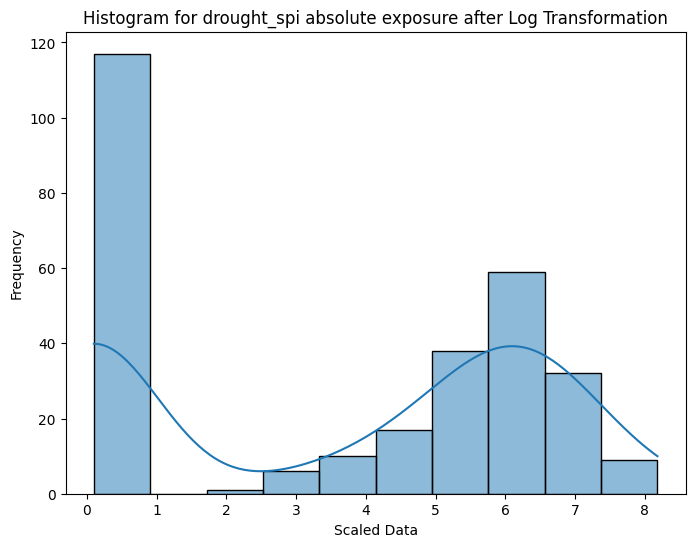

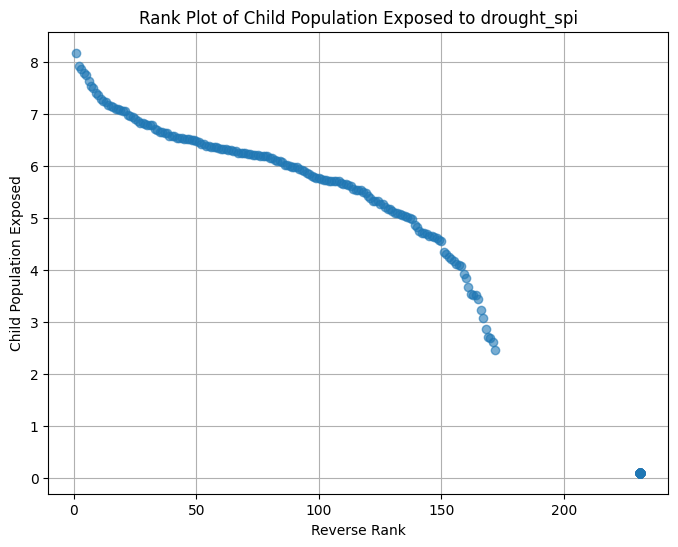

processed : drought_spei min: 0.1 max: 8.431002397757625
drought_spei: Log Transformation and Scaling - skew=-0.140, kurtosis=-1.654
IQR processed : drought_spei min: -8.854113798601363 max: 15.023522997668938


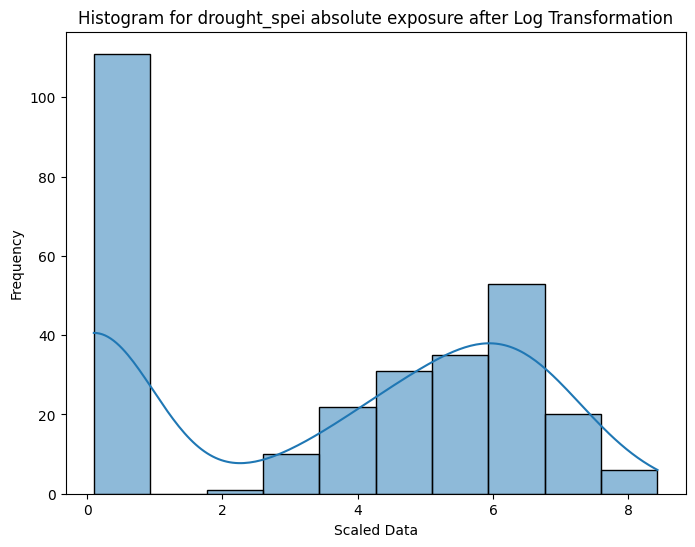

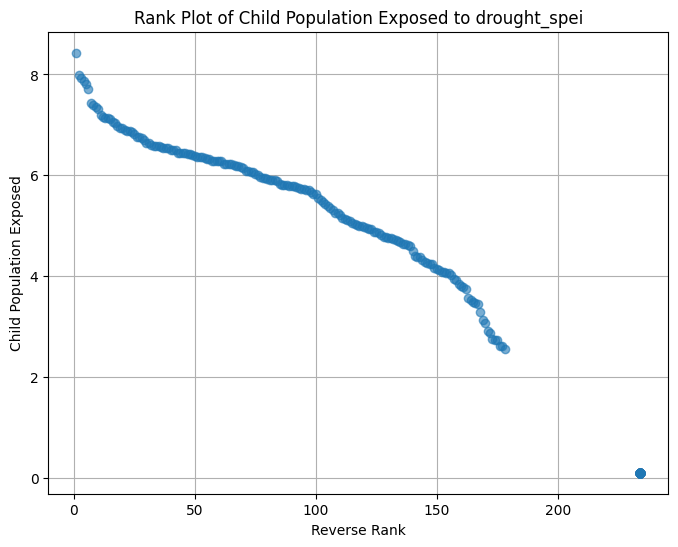

processed : coastal_flood min: 0.1 max: 7.163004929434298
coastal_flood: Log Transformation and Scaling - skew=0.288, kurtosis=-1.367
IQR processed : coastal_flood min: -5.561476629520309 max: 9.535794382533847


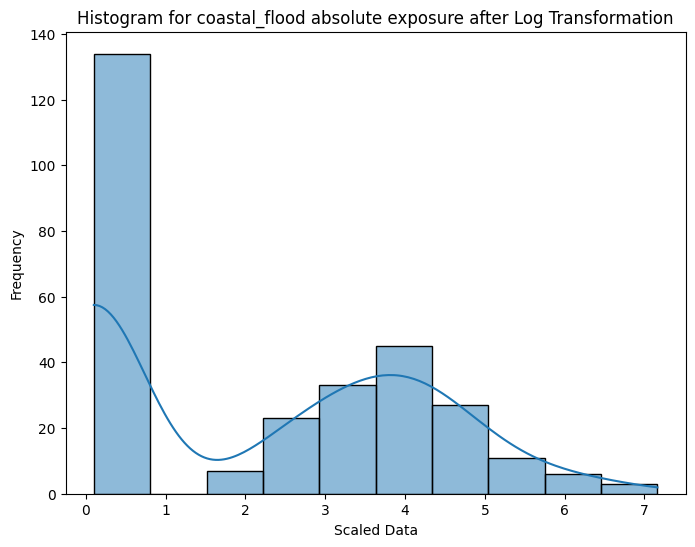

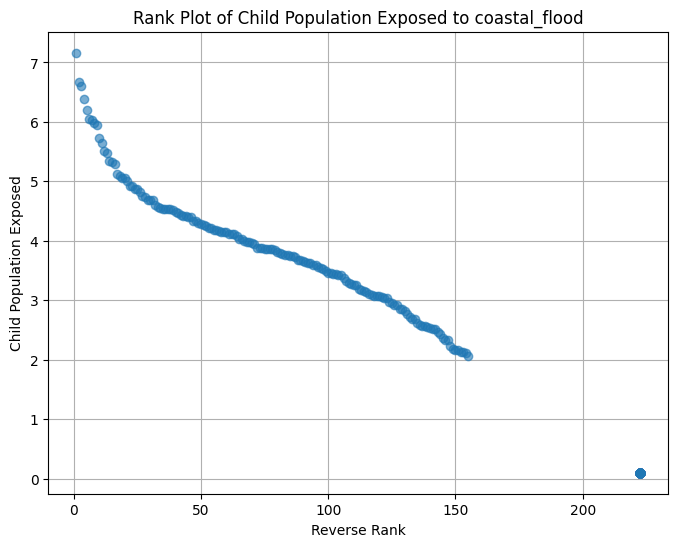

processed : extreme_heat min: 0.1 max: 8.598808537820771
extreme_heat: Log Transformation and Scaling - skew=0.481, kurtosis=-1.607
IQR processed : extreme_heat min: -8.65005380500221 max: 14.683423008337016


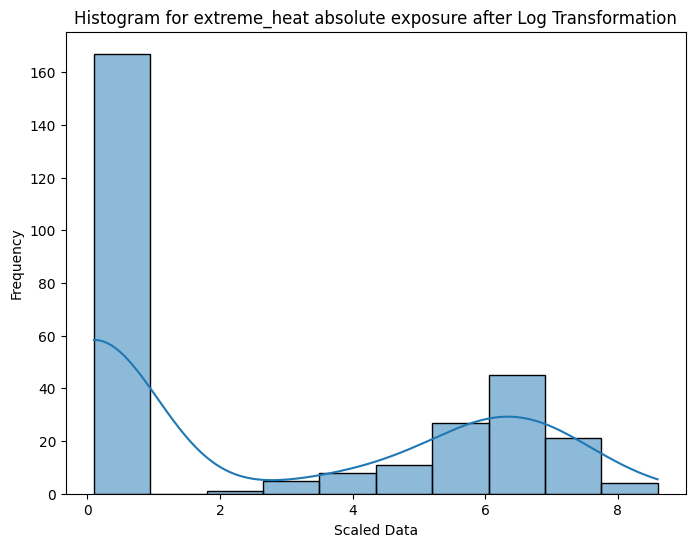

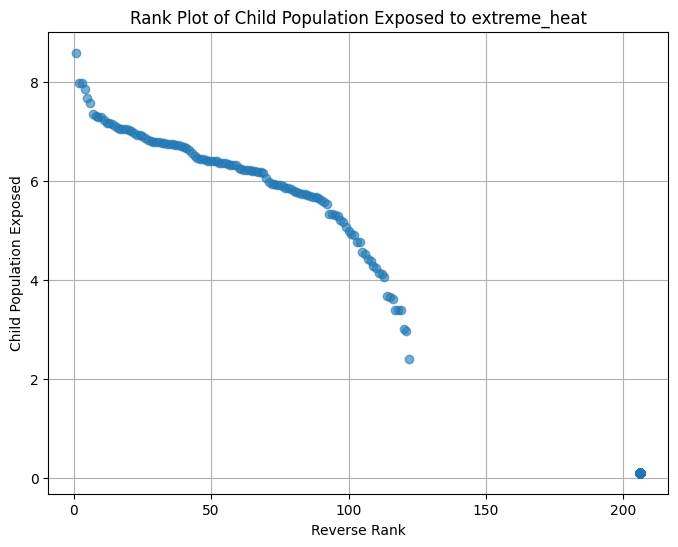

processed : fire_frequency min: 0.1 max: 7.350277241206103
fire_frequency: Log Transformation and Scaling - skew=-0.050, kurtosis=-1.604
IQR processed : fire_frequency min: -7.395886853179136 max: 12.59314475529856


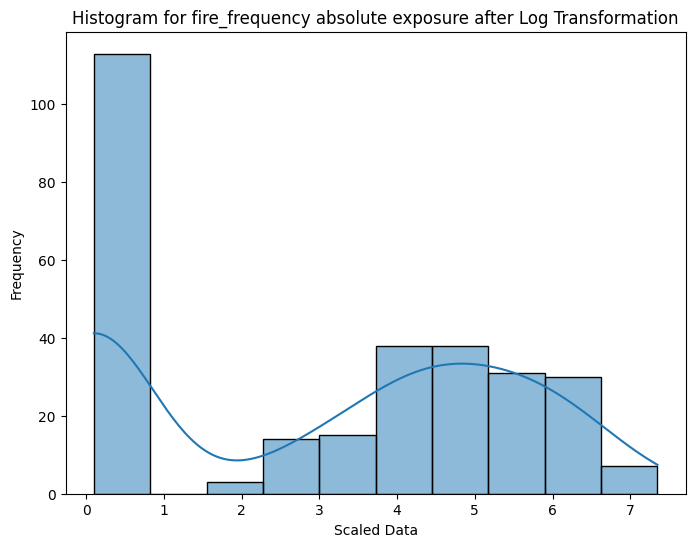

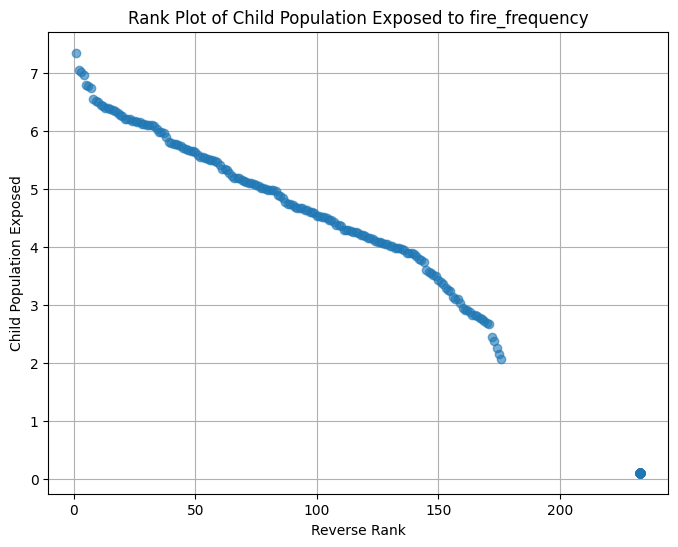

processed : fire_FRP min: 0.1 max: 6.877535295558921
fire_FRP: Log Transformation and Scaling - skew=-0.258, kurtosis=-1.632
IQR processed : fire_FRP min: -7.682675913639546 max: 13.071126522732577


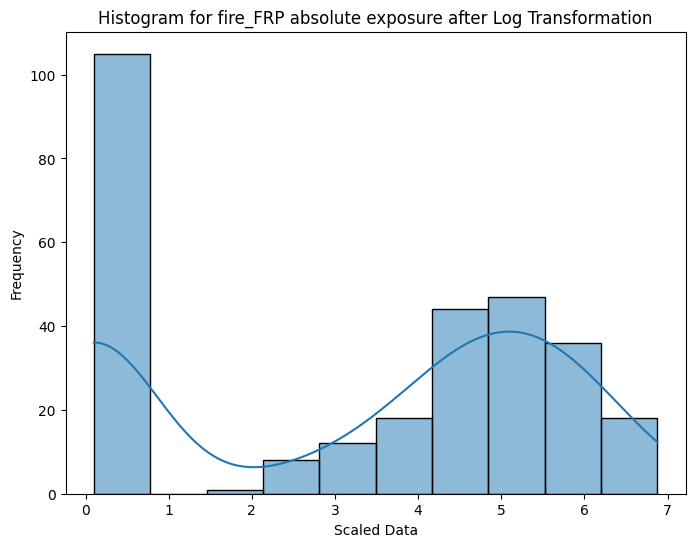

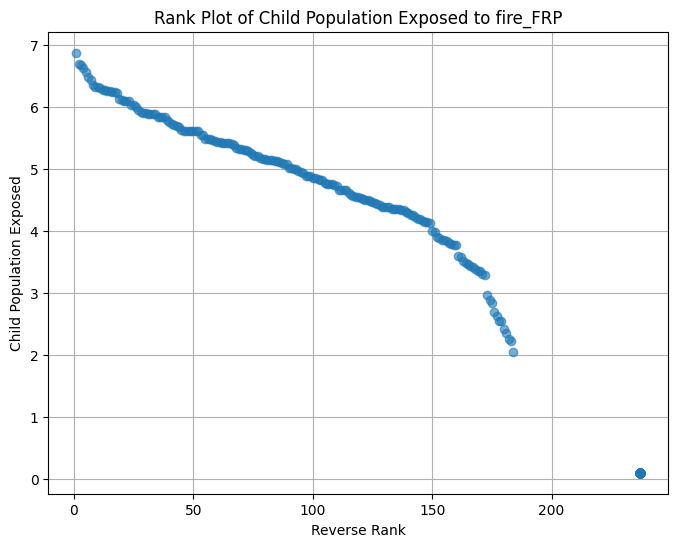

processed : heatwave_duration min: 0.1 max: 7.95986122351634
heatwave_duration: Log Transformation and Scaling - skew=-0.301, kurtosis=-1.577
IQR processed : heatwave_duration min: -9.199556982366321 max: 15.599261637277202


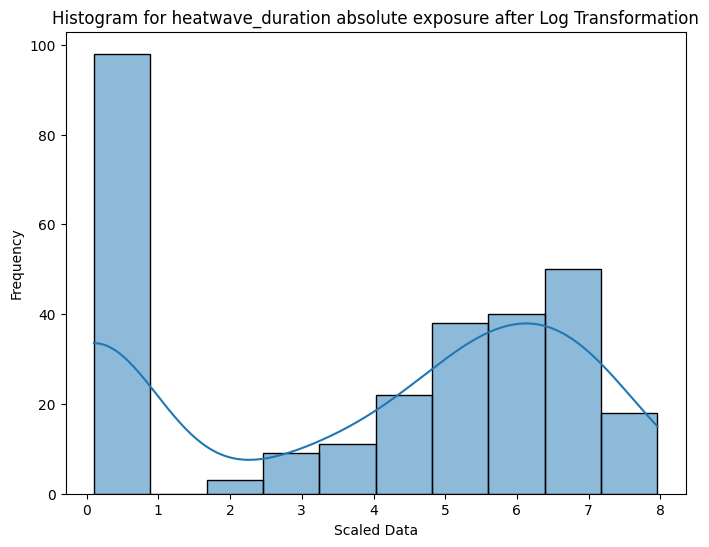

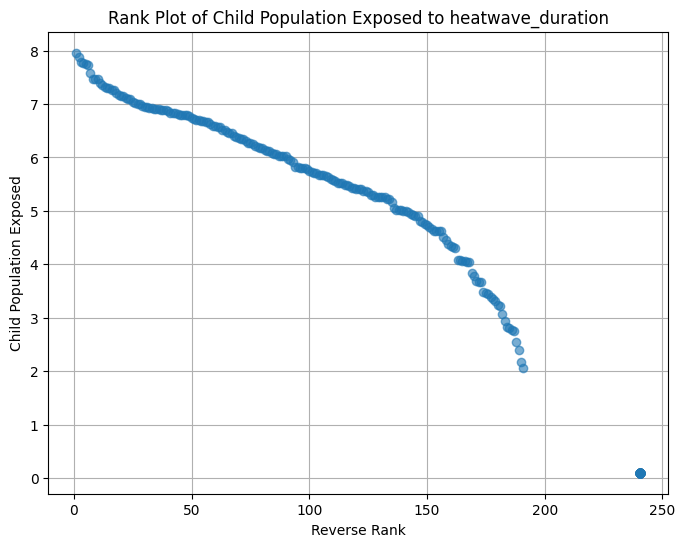

processed : heatwave_frequency min: 0.1 max: 7.85587957666388
heatwave_frequency: Log Transformation and Scaling - skew=-0.963, kurtosis=-0.323
IQR processed : heatwave_frequency min: -0.37718961954365504 max: 10.4295130512485


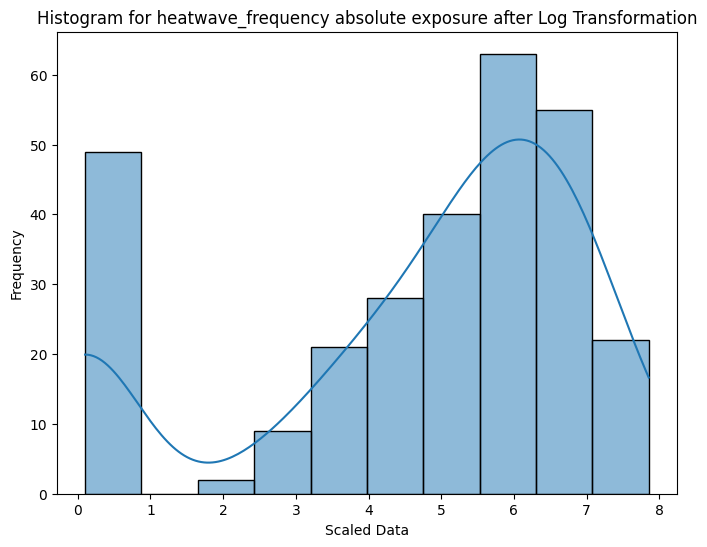

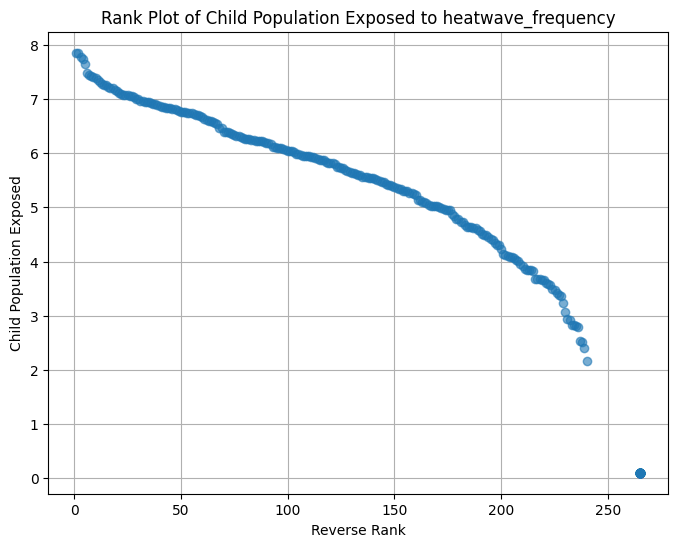

processed : heatwave_severity min: 0.1 max: 7.87910025578388
heatwave_severity: Log Transformation and Scaling - skew=0.584, kurtosis=-1.411
IQR processed : heatwave_severity min: -7.1573461072731135 max: 12.19557684545519


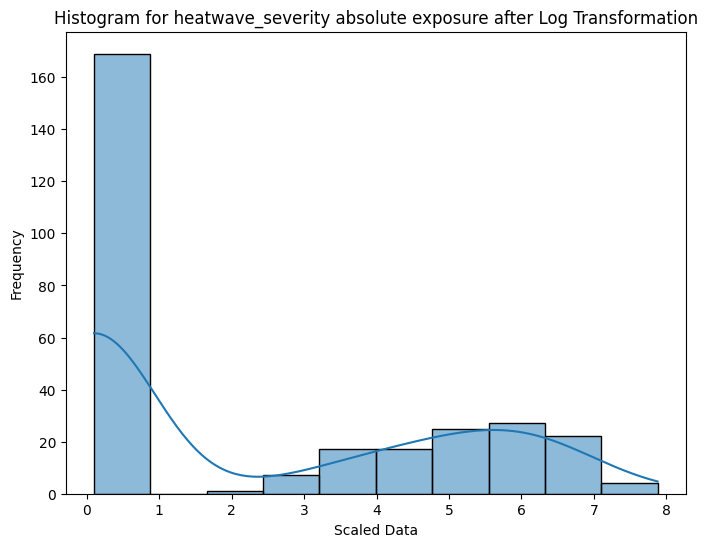

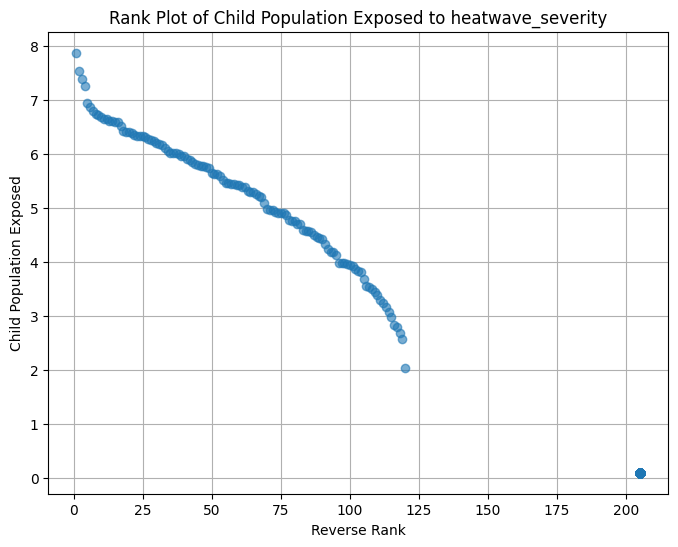

processed : river_flood min: 0.1 max: 7.874512807947438
river_flood: Log Transformation and Scaling - skew=-0.117, kurtosis=-1.687
IQR processed : river_flood min: -7.8250174694651005 max: 13.3083624491085


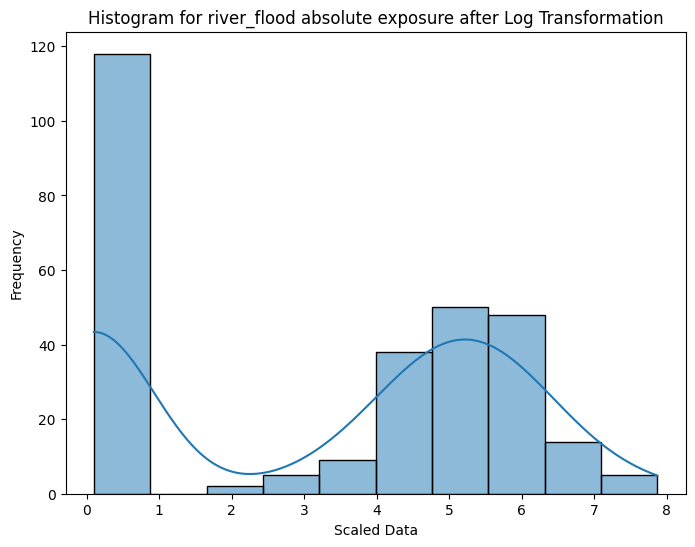

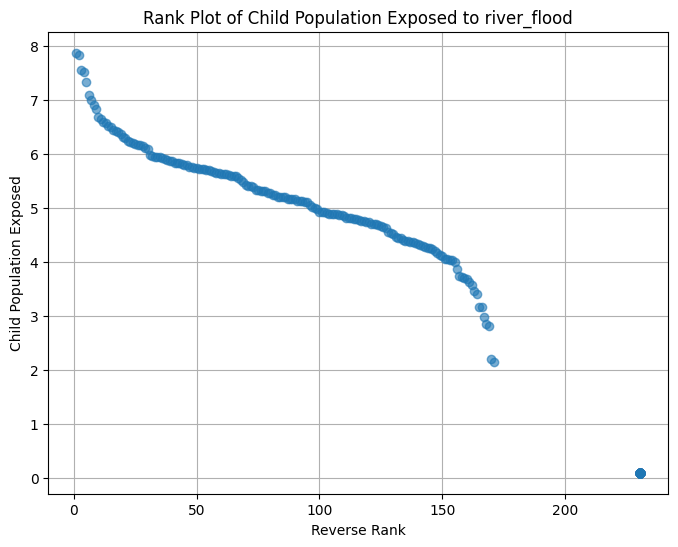

processed : tropical_storm min: 0.1 max: 8.194577111367613
tropical_storm: Log Transformation and Scaling - skew=0.645, kurtosis=-1.247
IQR processed : tropical_storm min: -6.956294971075533 max: 11.860491618459221


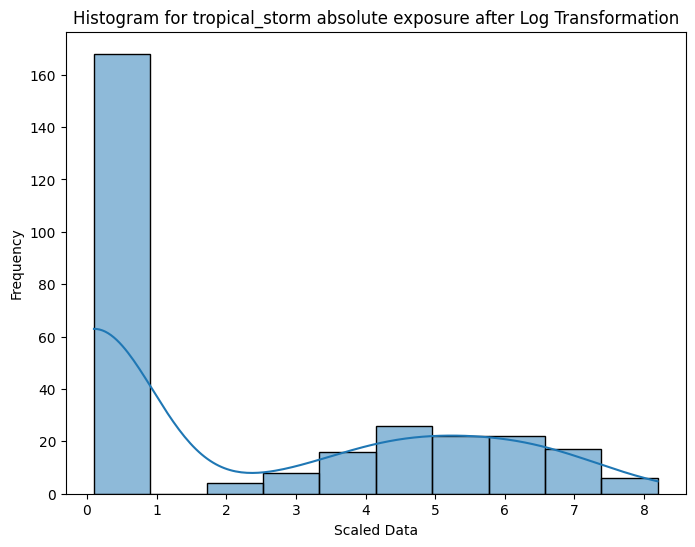

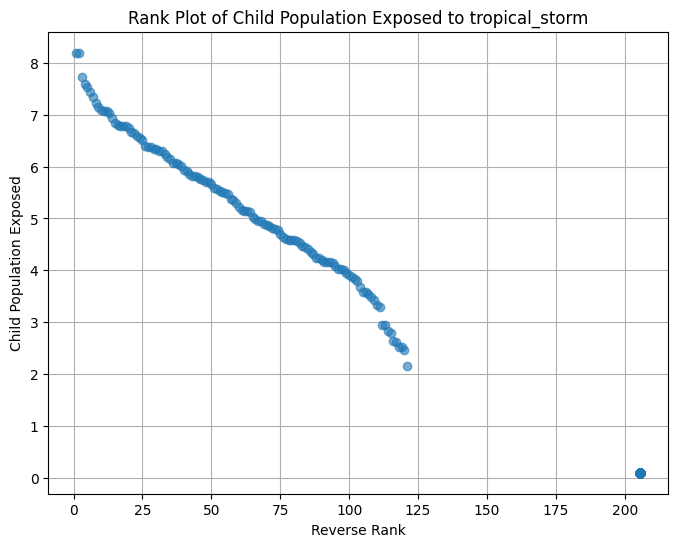

processed : sand_dust min: 0.1 max: 7.205487966695862
sand_dust: Log Transformation and Scaling - skew=0.307, kurtosis=-1.367
IQR processed : sand_dust min: -6.542330376942585 max: 11.170550628237642


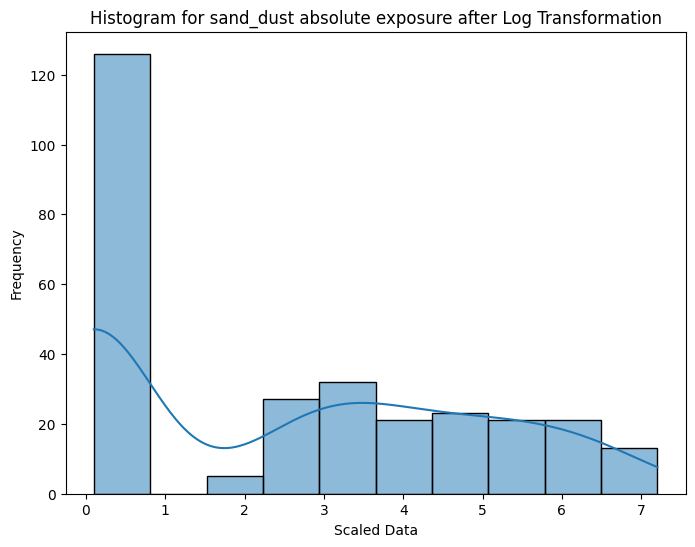

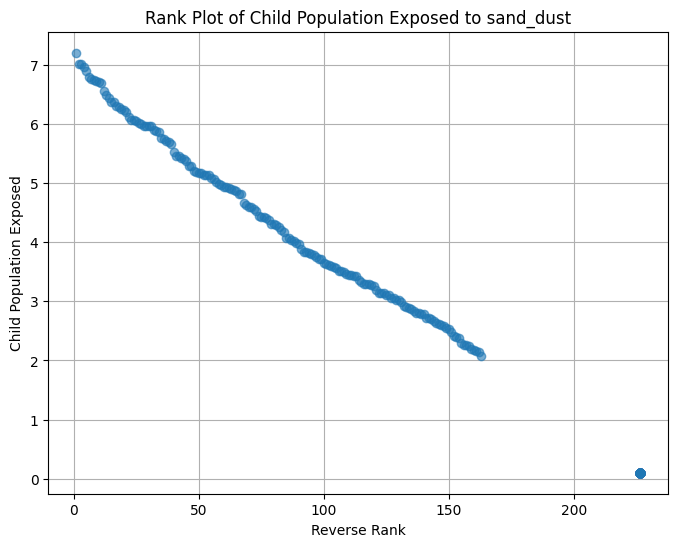

processed : vectorborne_malariapf min: 0.1 max: 8.043459123889761
vectorborne_malariapf: Log Transformation and Scaling - skew=1.030, kurtosis=-0.739
IQR processed : vectorborne_malariapf min: -6.450942338878811 max: 11.018237231464685


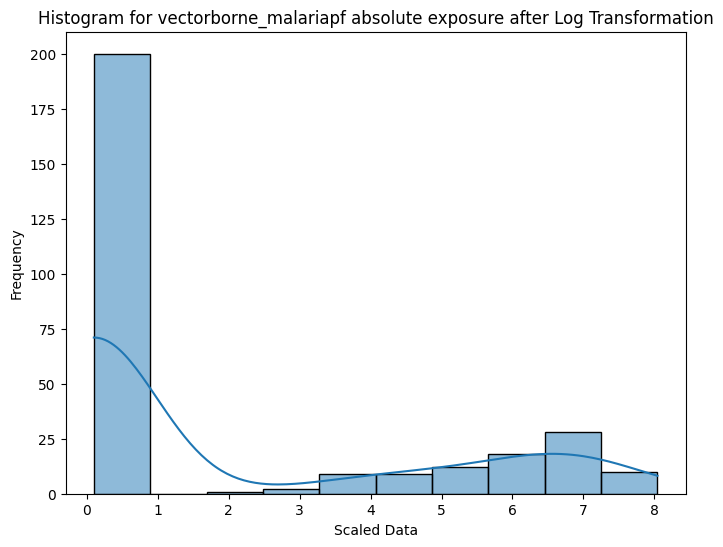

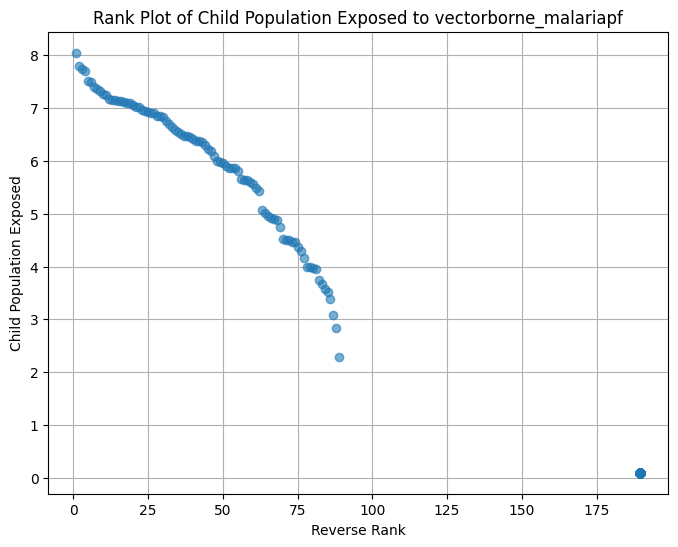

processed : vectorborne_malariapv min: 0.1 max: 8.523170631772553
vectorborne_malariapv: Log Transformation and Scaling - skew=1.811, kurtosis=1.628
IQR processed : vectorborne_malariapv min: 0.1 max: 0.1


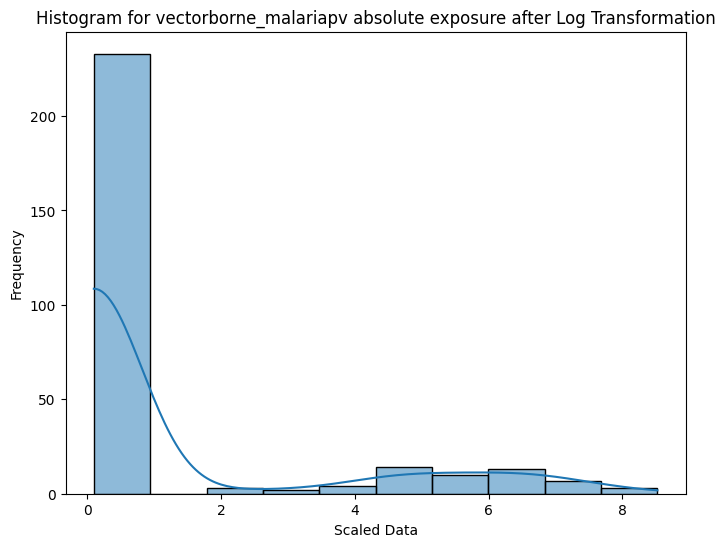

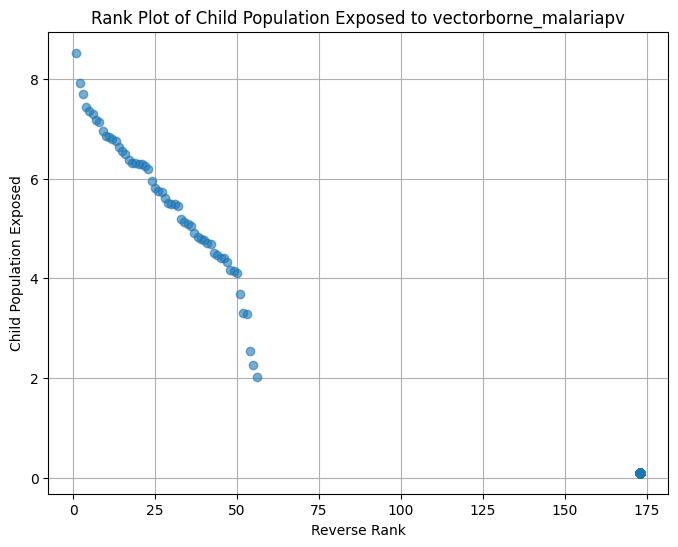

In [8]:

# Folder containing the CSV files
path = f'{data_dir}/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if iso3_name not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[[iso3_name, 'child_population_exposed']].dropna()

    # Apply iterative trimming
    # before data trimming, log10 is applied to values higher than 100 otherwise asign 0.1
    df['child_population_exposed'] = df['child_population_exposed'].dropna().values  # Ensure no NaNs
    with np.errstate(divide='ignore'):
      df['child_population_exposed'] = np.where(
          df['child_population_exposed'] > 100,
          np.log10(df['child_population_exposed']),
          0.1
      )
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['child_population_exposed'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])

    print(f"processed : {hazard_name} min: {min_trimmed} max: {max_trimmed}" )
    current_skew = skew(trimmed_values)
    current_kurtosis = kurtosis(trimmed_values)
    print(f"{hazard_name}: Log Transformation and Scaling - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['child_population_exposed'], kde=True)
    plt.title(f"Histogram for {hazard_name} absolute exposure after Log Transformation")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()

    # Compute ranks in reverse order
    df['rank_reverse'] = df['child_population_exposed'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['child_population_exposed'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()



0.0
100.00000000000003
Processed: air_pollution | Min: 0.3652558687529015 | Max: 100.0
air_pollution: Log Transformation - skew=-1.747, kurtosis=2.070
IQR processed : air_pollution min: -8041887.575329394 max: 13408676.30491662


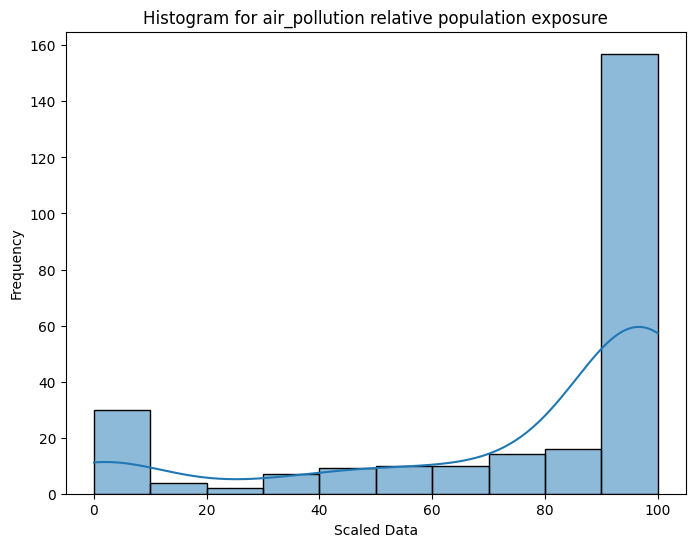

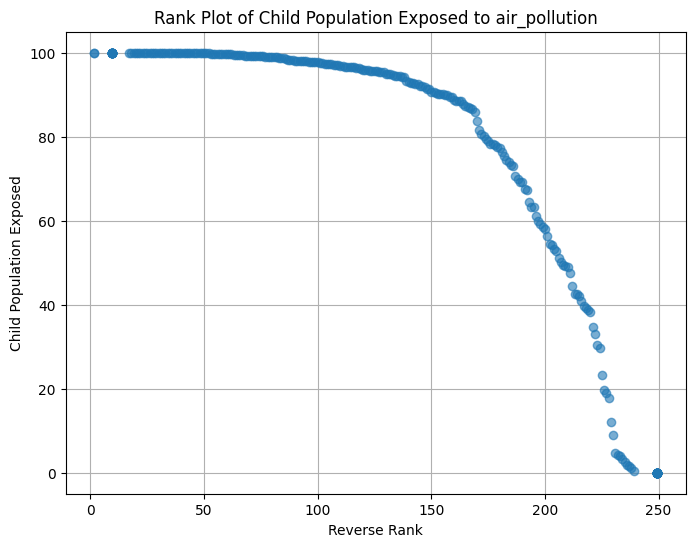

0.0
100.0
Processed: agricultural_drought | Min: 0.0004961217421616681 | Max: 94.82071531494641
agricultural_drought: Log Transformation - skew=0.083, kurtosis=-1.159
IQR processed : agricultural_drought min: -2842417.425466422 max: 4737362.37577737


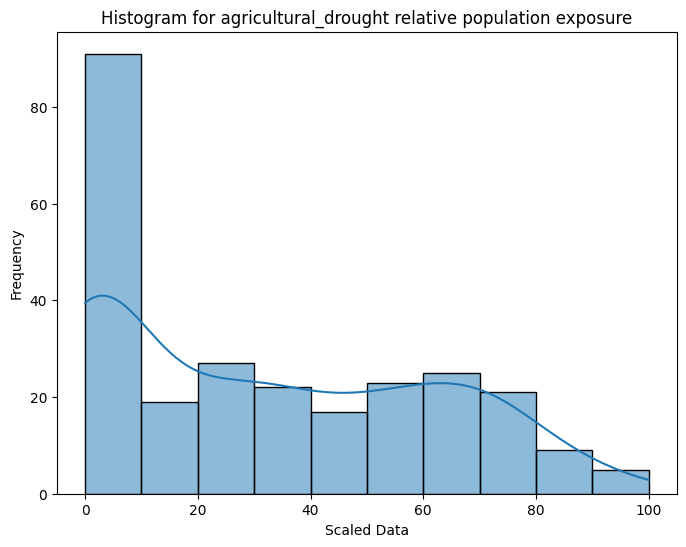

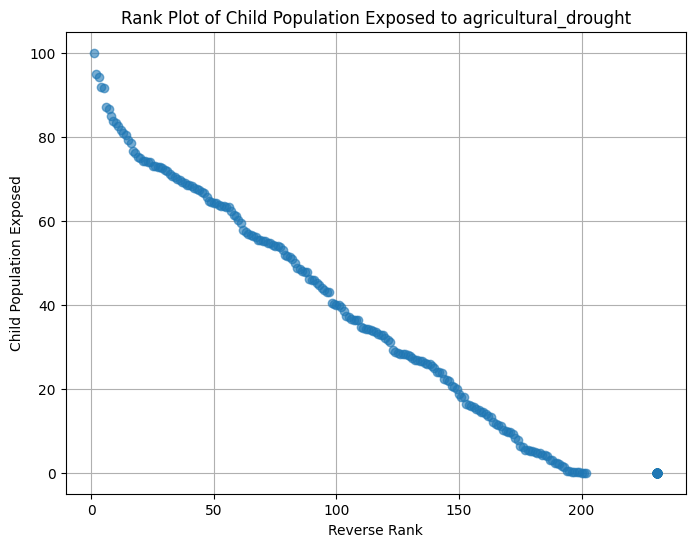

0.0
100.00000000000003
Processed: drought_spi | Min: 0.011268583639172384 | Max: 100.0
drought_spi: Log Transformation - skew=0.155, kurtosis=-1.572
IQR processed : drought_spi min: -2501760.7148429034 max: 4169601.191404839


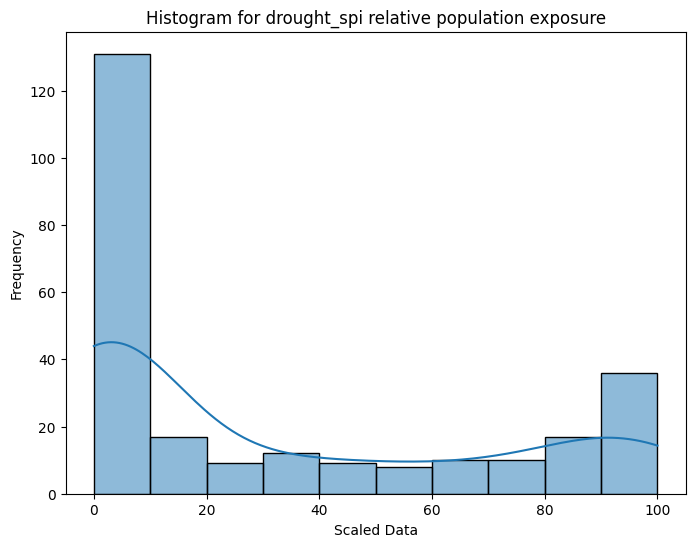

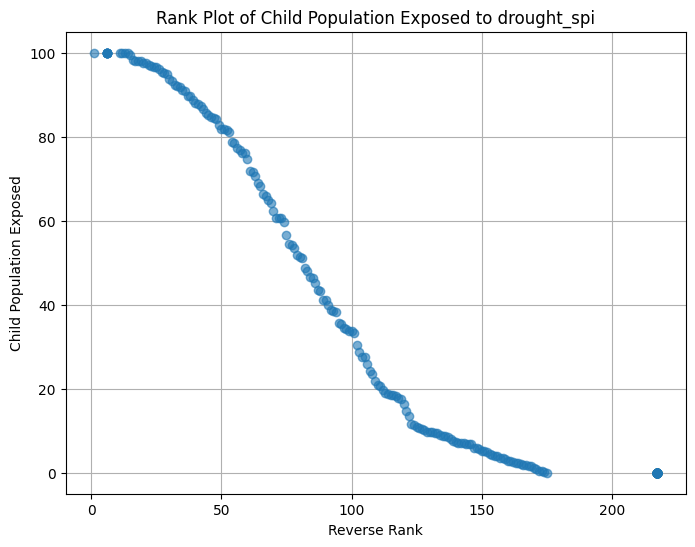

0.0
100.0
Processed: drought_spei | Min: 0.007487985428906576 | Max: 99.99998939086298
drought_spei: Log Transformation - skew=0.724, kurtosis=-0.989
IQR processed : drought_spei min: -1759950.5203155912 max: 2933250.867192652


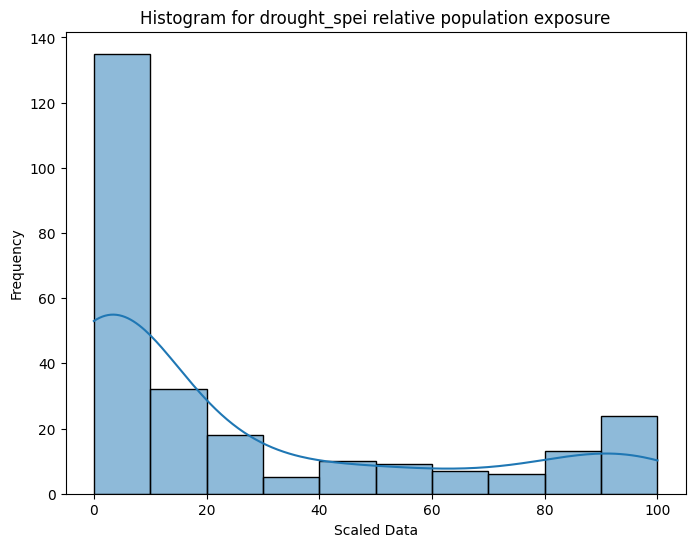

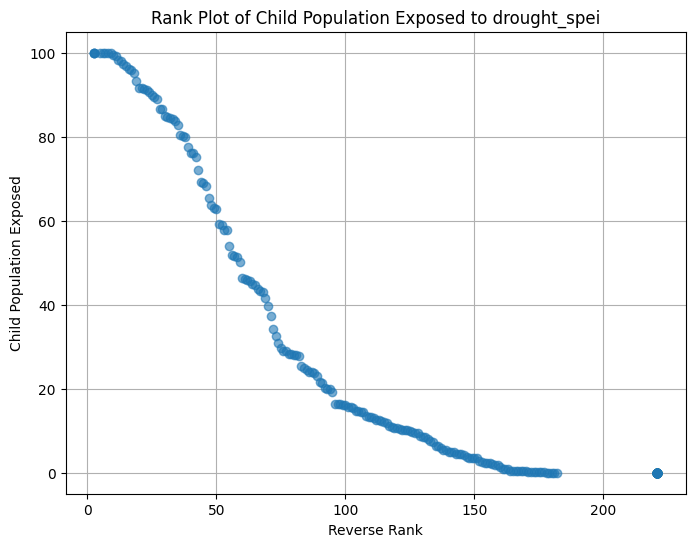

0.0
66.98133835178383
Processed: coastal_flood | Min: 0.013328258934105391 | Max: 7.333455934973414
coastal_flood: Log Transformation - skew=1.962, kurtosis=2.735
IQR processed : coastal_flood min: -11230.75652305309 max: 18717.92753842182


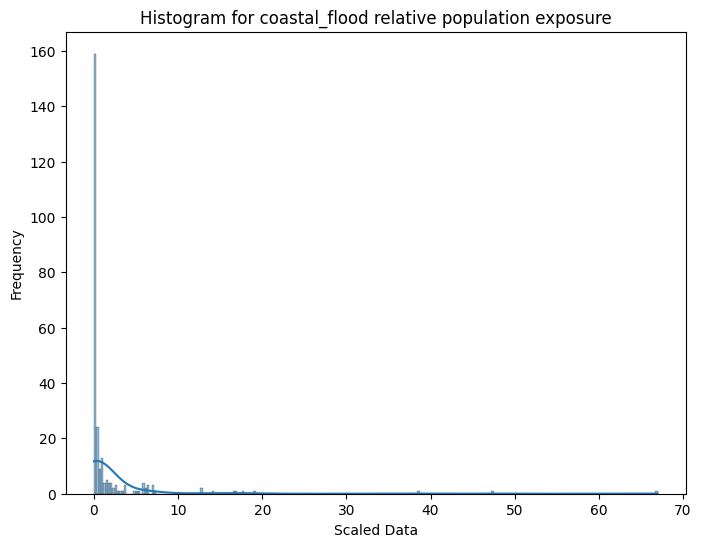

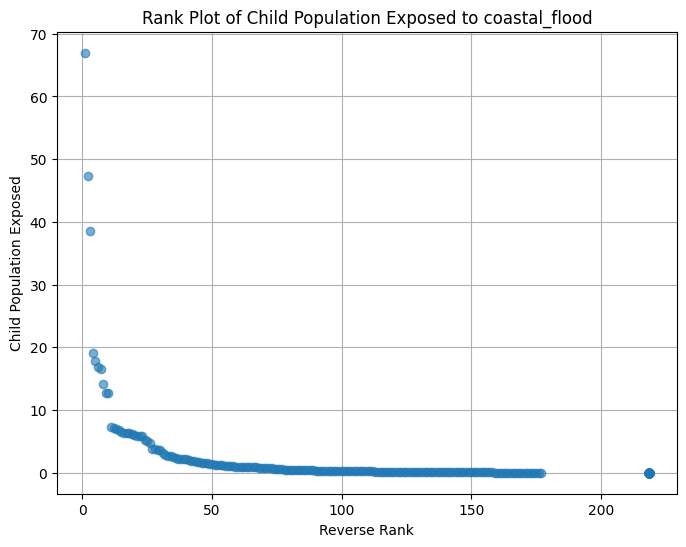

0.0
100.0
Processed: extreme_heat | Min: 0.00012541837885238308 | Max: 99.99999999999999
extreme_heat: Log Transformation - skew=0.330, kurtosis=-1.372
IQR processed : extreme_heat min: -1286650.1127307615 max: 2144416.854551269


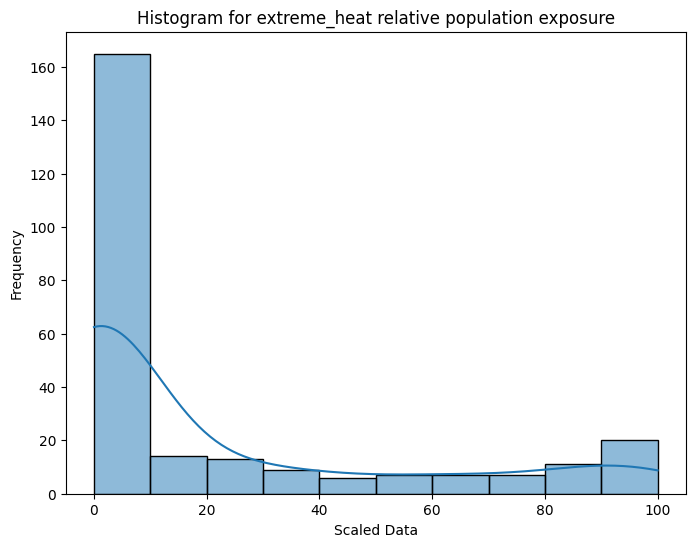

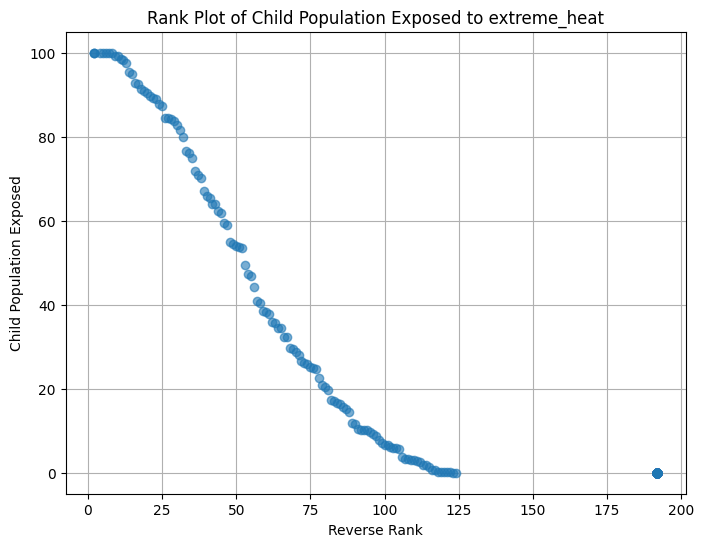

0.0
72.01883982607583
Processed: fire_frequency | Min: 0.08023263188640527 | Max: 27.602094738214237
fire_frequency: Log Transformation - skew=1.825, kurtosis=3.313
IQR processed : fire_frequency min: -187650.25597565717 max: 312750.4266260953


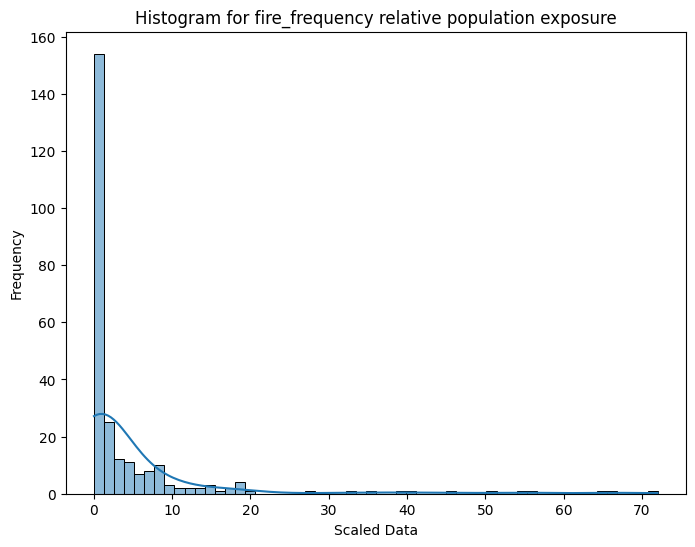

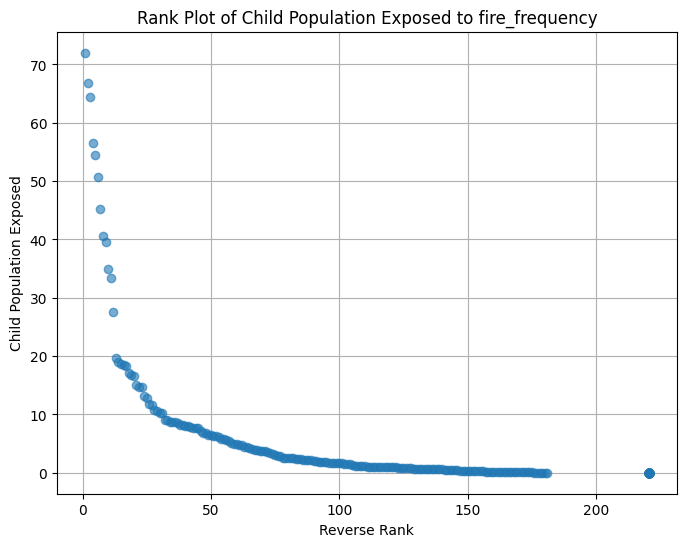

0.0
49.54493135597998
Processed: fire_FRP | Min: 0.17420593172591758 | Max: 22.031915290544948
fire_FRP: Log Transformation - skew=1.748, kurtosis=3.378
IQR processed : fire_FRP min: -291435.10791715706 max: 485725.17986192845


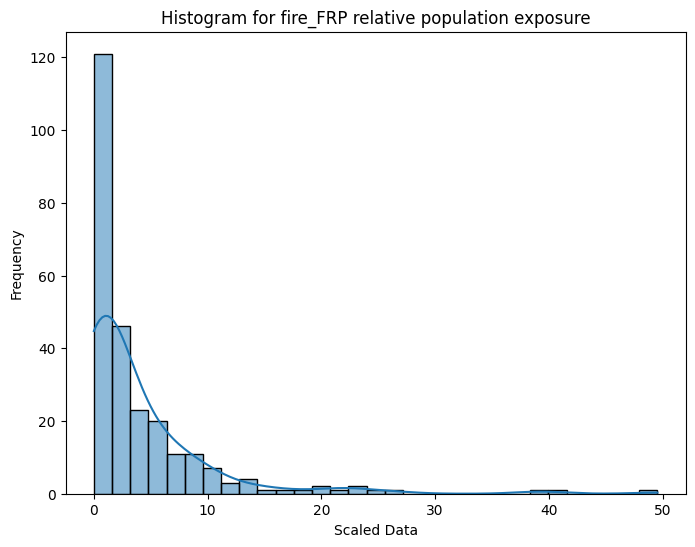

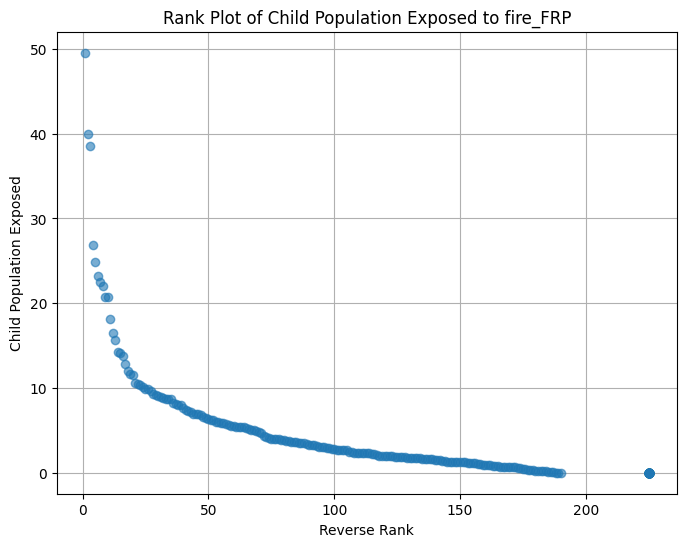

0.0
100.0
Processed: heatwave_duration | Min: 0.010957567352006231 | Max: 99.96805301482894
heatwave_duration: Log Transformation - skew=-0.087, kurtosis=-1.409
IQR processed : heatwave_duration min: -2990858.825616583 max: 4984764.709360972


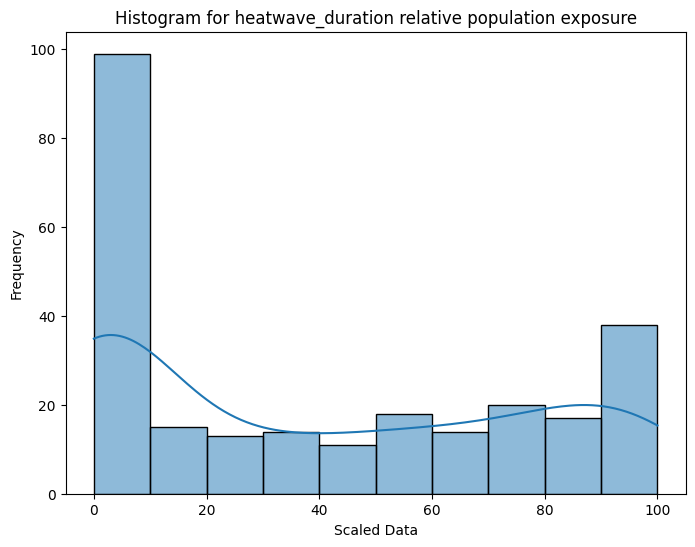

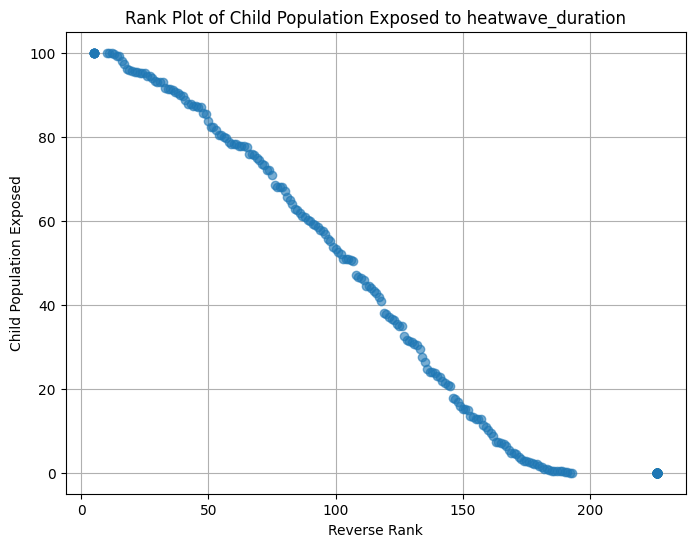

0.0
100.0
Processed: heatwave_frequency | Min: 0.9499325897626889 | Max: 99.99983723847025
heatwave_frequency: Log Transformation - skew=-0.527, kurtosis=-0.861
IQR processed : heatwave_frequency min: -3561637.8926095893 max: 5948689.934366152


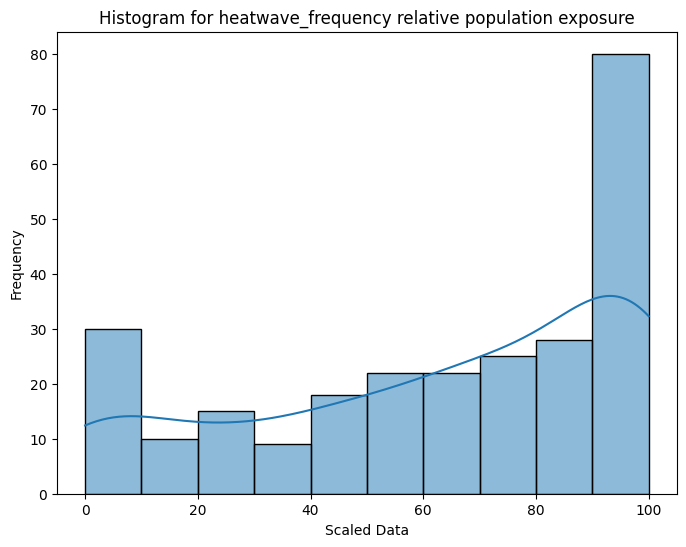

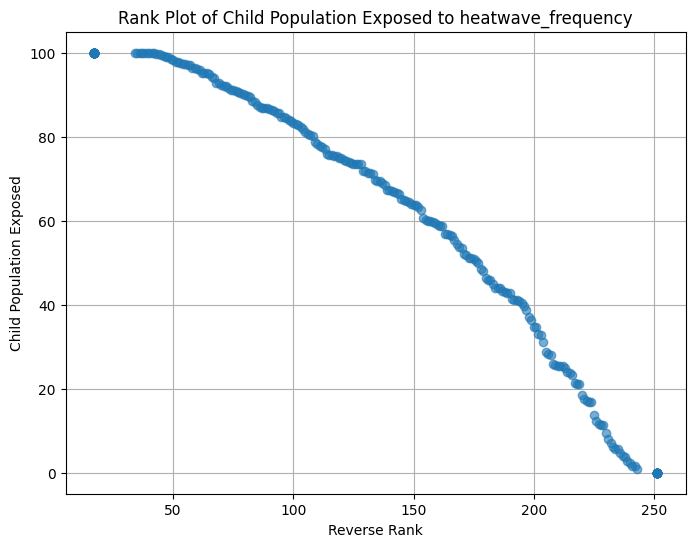

0.0
99.248263774063
Processed: heatwave_severity | Min: 2.3275337526848254e-05 | Max: 88.84613418468746
heatwave_severity: Log Transformation - skew=1.253, kurtosis=0.514
IQR processed : heatwave_severity min: -130113.39150625133 max: 216855.65251041888


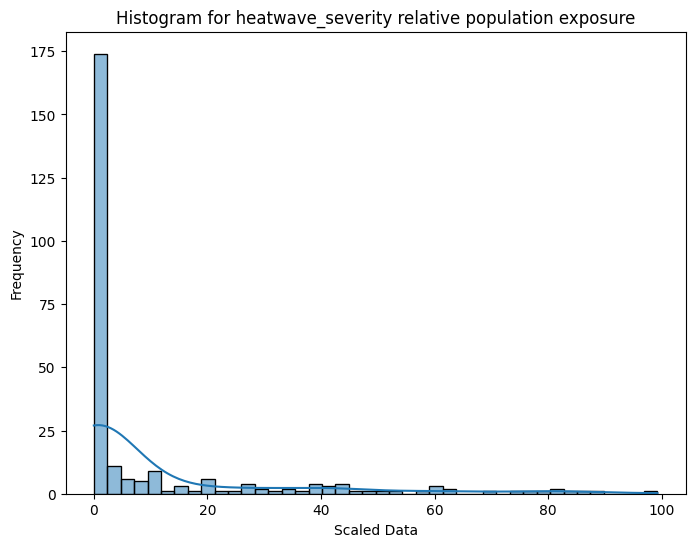

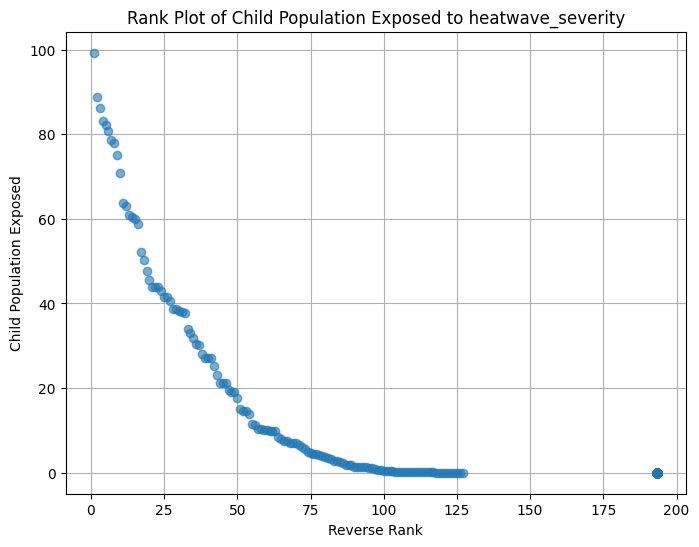

0.0
75.90565373748571
Processed: river_flood | Min: 0.29134916314026177 | Max: 33.22905554023619
river_flood: Log Transformation - skew=1.741, kurtosis=3.208
IQR processed : river_flood min: -362607.04588557506 max: 604345.0764759585


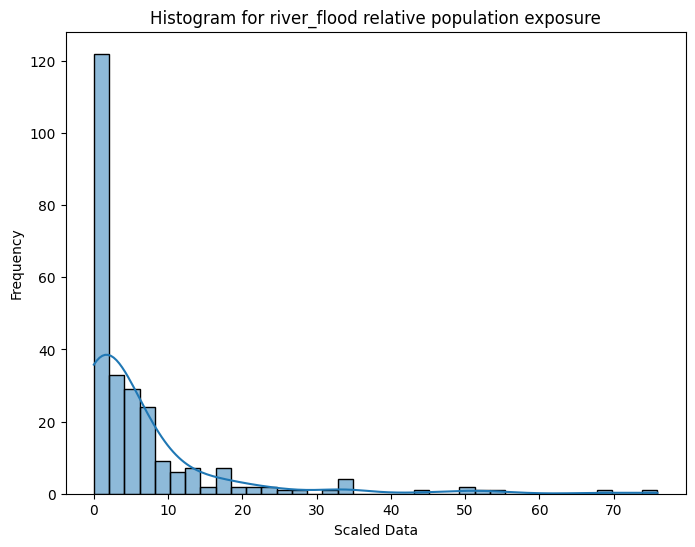

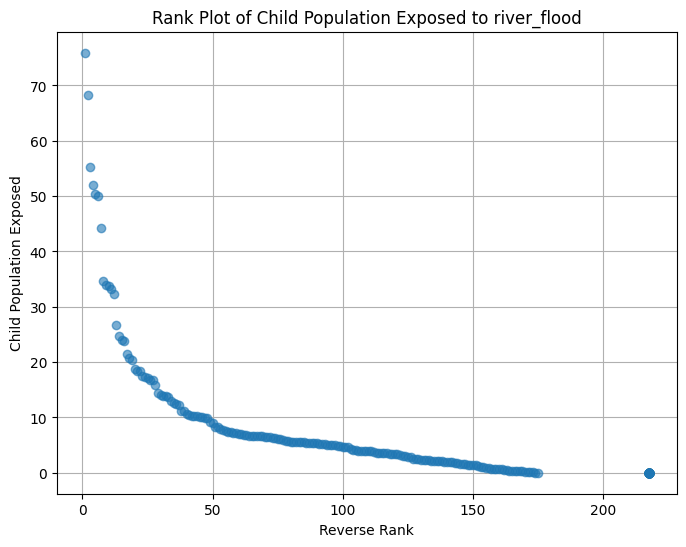

0.0
100.00000000000004
Processed: tropical_storm | Min: 1.591652129969955e-05 | Max: 100.00000000000003
tropical_storm: Log Transformation - skew=-1.250, kurtosis=-0.126
IQR processed : tropical_storm min: -95562.58882676093 max: 159270.98137793486


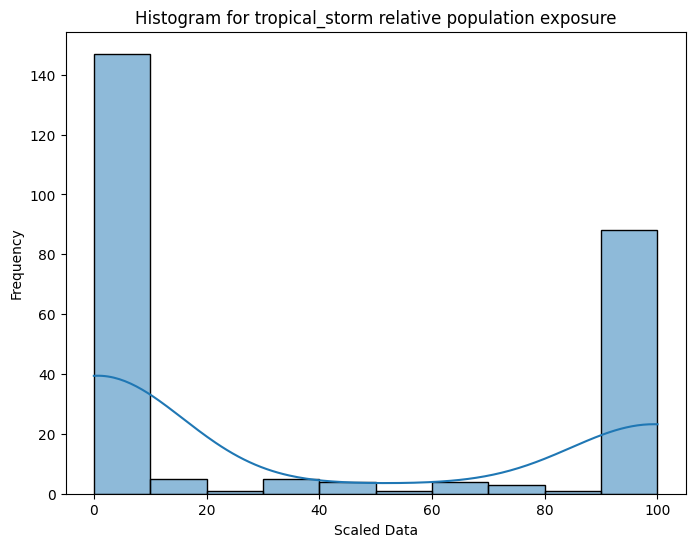

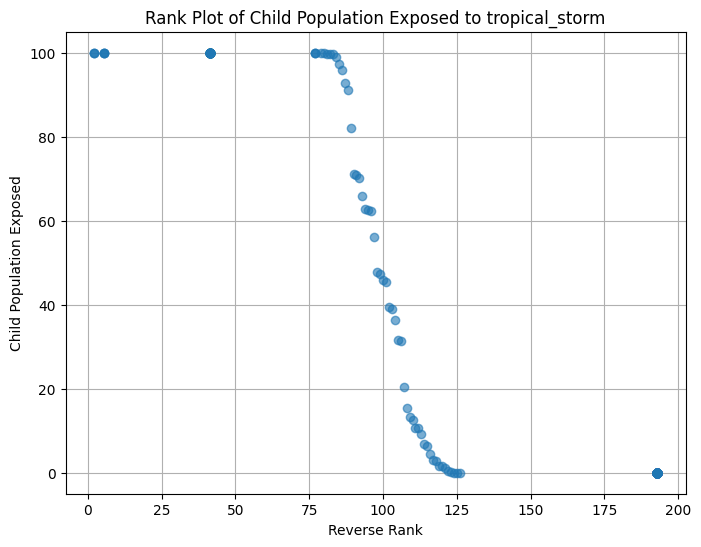

0.0
100.0
Processed: sand_dust | Min: 0.01552870730664866 | Max: 12.451761104018487
sand_dust: Log Transformation - skew=1.969, kurtosis=3.074
IQR processed : sand_dust min: -50618.760960813845 max: 84364.60160135641


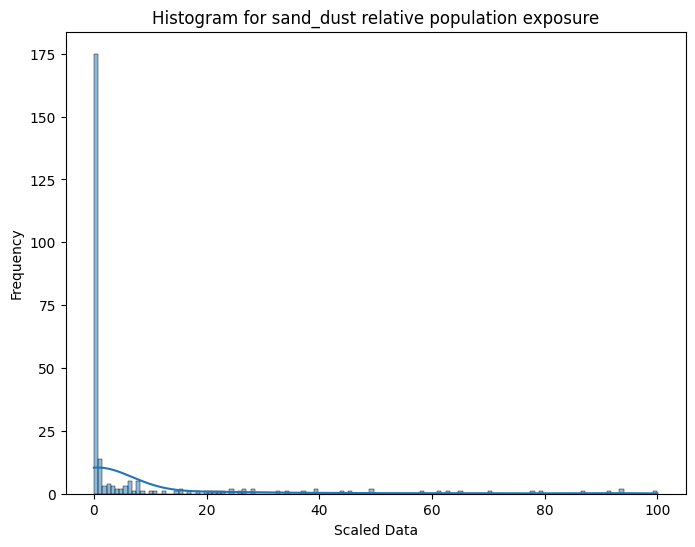

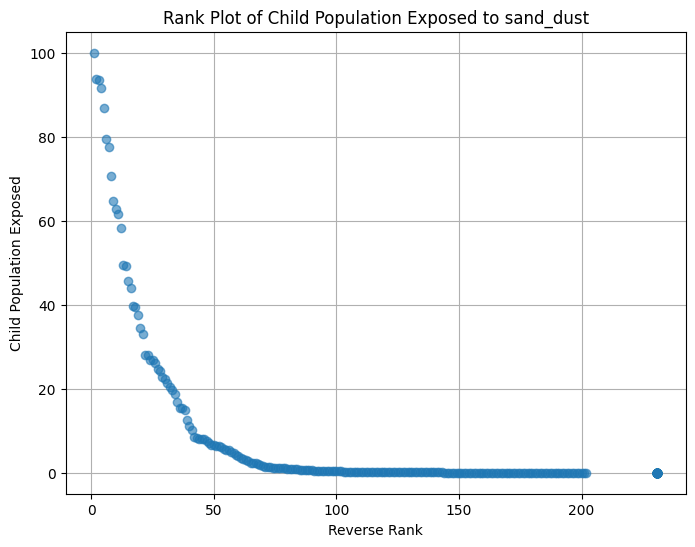

0.0
100.00000000000003
Processed: vectorborne_malariapf | Min: 0.00010586668827015425 | Max: 100.0
vectorborne_malariapf: Log Transformation - skew=-0.208, kurtosis=-1.803
IQR processed : vectorborne_malariapf min: -43993.26063509332 max: 73322.10105848886


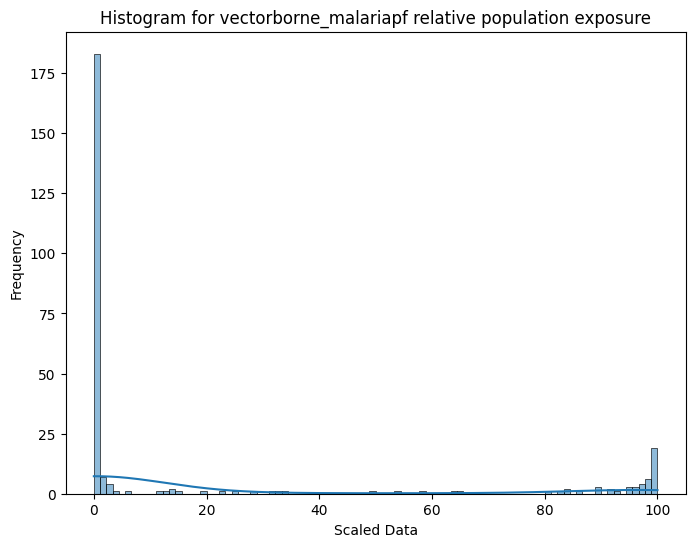

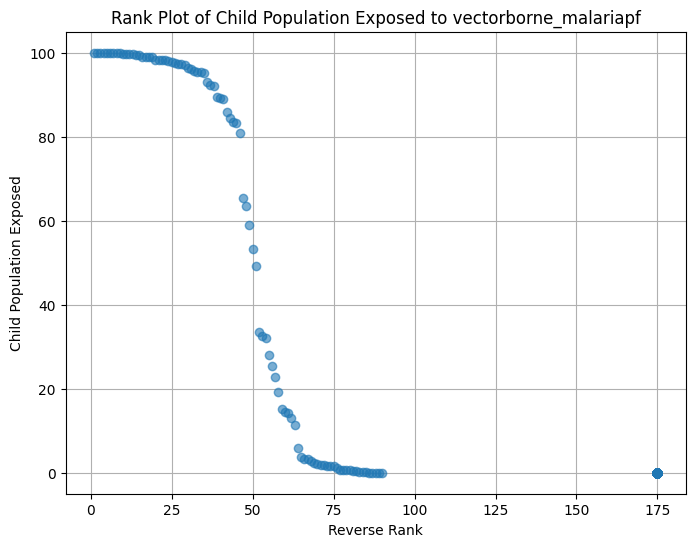

0.0
99.99443008609865
Processed: vectorborne_malariapv | Min: 0.00028292522391126643 | Max: 99.93658561284295
vectorborne_malariapv: Log Transformation - skew=0.495, kurtosis=-1.502
IQR processed : vectorborne_malariapv min: 0.0 max: 0.0


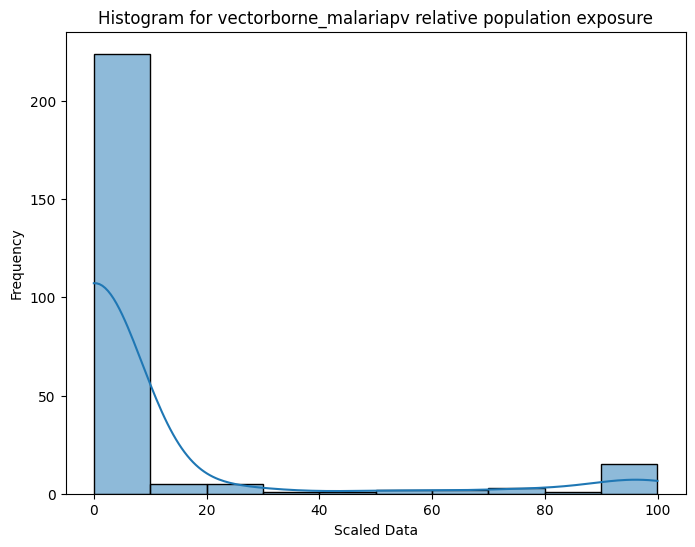

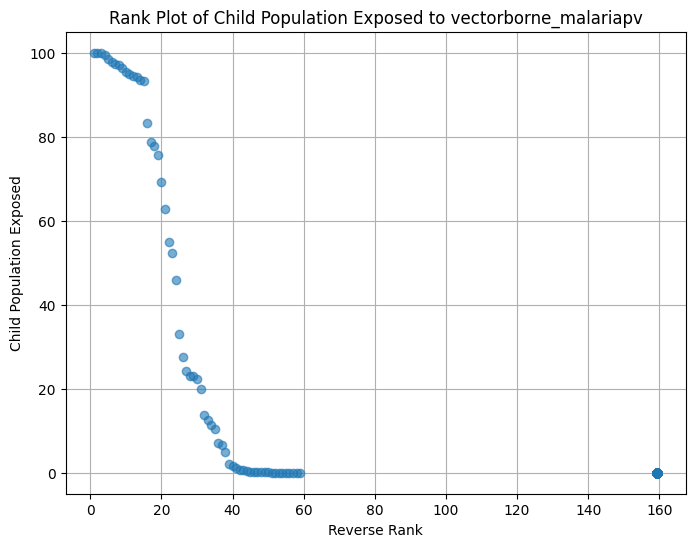

In [9]:

# Process each hazard file
for file in all_files:
    # Exclude the total population file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if iso3_name not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[[iso3_name, 'child_population_exposed','child_population_total']].dropna()
    df['relative_population_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        np.nan  # Assign NaN instead of inf
    )

    print( df['relative_population_exposure'].min())
    print( df['relative_population_exposure'].max())
    # Apply iterative trimming
    # Trim outliers
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['relative_population_exposure'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])
    # Check if there are enough values to calculate skewness and kurtosis
    if len(trimmed_values) > 2:
        current_skew = skew(trimmed_values)
        current_kurtosis = kurtosis(trimmed_values)
    else:
        current_skew, current_kurtosis = np.nan, np.nan

    print(f"Processed: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )
    print(f"{hazard_name}: Log Transformation - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['relative_population_exposure'], kde=True)
    plt.title(f"Histogram for {hazard_name} relative population exposure")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()


    # Compute ranks in reverse order
    df['rank_reverse'] = df['relative_population_exposure'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['relative_population_exposure'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()




In [10]:
import os
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Define file paths
exposure_path = f'{data_dir}/p1_exposure'

# Get all CSV files for exposure
exposure_files = glob.glob(os.path.join(exposure_path, "*.csv"))

# Initialize empty list for processed data
exposure_data_list = []

### **Process Each File in One Loop**
for file in exposure_files:

    df = pd.read_csv(file)  # Read full file to check available columns
    df =  df[df['type'] == 'State'] #filter out areas other than 'State'
    filename_only = os.path.basename(file)
    hazard_name = '_'.join(filename_only.split('_')[:2])  # Extract hazard name

    # Ensure required columns exist
    required_cols = {iso3_name, adm_name, 'child_population_exposed', 'child_population_total'}
    if not required_cols.issubset(df.columns):
        print(f"Skipping {file}: Missing columns {required_cols - set(df.columns)}")
        continue  # Skip if required columns are missing

    df.dropna(subset=['child_population_exposed'], inplace=True)

    ### **Step 1: Absolute Exposure Processing**
    # Log transform with clipping for values >100, otherwise assign 0.1
    df['absolute_exposure'] = np.where(df['child_population_exposed'] > 100,
                                       np.log10(df['child_population_exposed'].clip(lower=1)),  # Clip to avoid log10(0)
                                       0.1)
    #open min_max data file and use them to normalize the values
    df_min_max = pd.read_csv(f'{data_dir}/CCRI_results_misc/p1_min_max.csv')
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'max'].values[0]

    # clip to min max
    df['absolute_exposure'] = np.clip(df['absolute_exposure'], min_trimmed, max_trimmed)
    scaler = MinMaxScaler(feature_range=(1, 10))  # scale to 1–10
    df['absolute_value_normalized'] = scaler.fit_transform(df[['absolute_exposure']]).flatten()

    ### **Step 2: Relative Exposure Processing**

    # Compute relative exposure (%)
    df['relative_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        0
    )

    # #get min max values for relative exposures
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'max'].values[0]

    # # Normalize relative exposure
    df['relative_exposure'] = np.clip(df['relative_exposure'], min_trimmed, max_trimmed)
    df['relative_value_normalized'] = scaler.fit_transform(df[['relative_exposure']]).flatten()

    #If absolute value is zero, relative is also zero
    df.loc[df['absolute_value_normalized'] == 0, 'relative_value_normalized'] = 0
    df.loc[df['relative_value_normalized'] == 0, 'absolute_value_normalized'] = 0

    # Rename columns for final merging
    df.rename(columns={
        'absolute_value_normalized': hazard_name + '_absolute',
        'relative_value_normalized': hazard_name + '_relative'
    }, inplace=True)

    # Append processed data to list
    exposure_data_list.append(df[[iso3_name, adm_name,
                                  hazard_name + '_absolute',
                                  hazard_name + '_relative']])

### **Final Merge Step**
# Concatenate all processed DataFrames
merged_exposure_df = pd.concat(exposure_data_list, axis=1).drop_duplicates(subset=[iso3_name, adm_name])

# Ensure no duplicate columns before merging
merged_exposure_df = merged_exposure_df.loc[:, ~merged_exposure_df.columns.duplicated()]
merged_exposure_df = merged_exposure_df.rename(columns={iso3_name: "iso3"})

# Save merged exposure data
output_path = f"{data_dir}/CCRI_results_misc/Merged_Exposure_Data.csv"
merged_exposure_df.to_csv(output_path, index=False)
print(f"Merged exposure data saved to {output_path}")


Merged exposure data saved to /content/drive/MyDrive/CCRI/ccri_repo/data/CCRI_results_misc/Merged_Exposure_Data.csv
